<a href="https://colab.research.google.com/github/RoyAssa107/Machine_Learning/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q sklearn

In [2]:
%tensorflow_version 2.0x

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0x`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

# imports for handling our model
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf


In [19]:
# Loading dataset 
trainData = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
testData =  pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")
y_train = trainData["survived"]
y_test = testData["survived"]
print(testData.loc[0], y_train.loc[0]) # Getting a specific column in dataFrame by the loc method

survived                        0
sex                          male
age                            35
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object 0


In [7]:
print(trainData.head())
print(trainData.describe())

   survived     sex   age  ...     deck  embark_town  alone
0         0    male  22.0  ...  unknown  Southampton      n
1         1  female  38.0  ...        C    Cherbourg      n
2         1  female  26.0  ...  unknown  Southampton      y
3         1  female  35.0  ...        C  Southampton      n
4         0    male  28.0  ...  unknown   Queenstown      y

[5 rows x 10 columns]
         survived         age  n_siblings_spouses       parch        fare
count  627.000000  627.000000          627.000000  627.000000  627.000000
mean     0.387560   29.631308            0.545455    0.379585   34.385399
std      0.487582   12.511818            1.151090    0.792999   54.597730
min      0.000000    0.750000            0.000000    0.000000    0.000000
25%      0.000000   23.000000            0.000000    0.000000    7.895800
50%      0.000000   28.000000            0.000000    0.000000   15.045800
75%      1.000000   35.000000            1.000000    0.000000   31.387500
max      1.000000   80.00

In [8]:
trainData.shape  # Getting the shape of the training data

(627, 10)

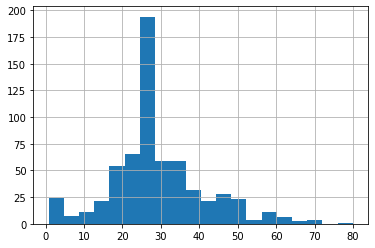

In [9]:
# Plotting a histogram of the ages 
trainData.age.hist(bins=20)

##Getting categorical columns and numeric columns

Because some features in our data contain features represented as strings, we need to convert them to numeric values in order to train our model with these features

In [10]:
CATEGORICAL_COLUMNS = ["sex","n_siblings_spouses","parch","class","deck","embark_town","alone"]
NUMERIC_COLUMNS = ["age","fare"]

In [16]:
feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = trainData[feature_name].unique()  # Getting a list of unique values in this columns
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))

print(feature_columns)


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

Create an input function that will create our data for the model (both training and test in form of tf.data.DataSet

In [27]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) # creating the tf.data.DataSet
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(trainData, y_train)
test_input_fn = make_input_fn(testData, y_test, num_epochs=10, shuffle=False)

##Creating the model

In [23]:
linear_estimator = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpn8qw3jh9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Training the model 

In [33]:
linear_estimator.train(train_input_fn) # Training model with the function we've created up here

result = linear_estimator.evaluate(test_input_fn)  # Get the results in a matrix form

clear_output()

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpn8qw3jh9/model.ckpt-800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 800...
INFO:tensorflow:Saving checkpoints for 800 into /tmp/tmpn8qw3jh9/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 800...
INFO:tensorflow:loss = 0.3611362, step = 800
INFO:tensorflow:global_step/sec: 155.267
INFO:tensorflow:loss = 0.5738888, step = 900 (0.649 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1000...
INFO:tensorflow:Saving checkpoints for 1000 into /tmp/tmpn8qw3jh9/model.ckpt.
Instructions for updating:
Use standard file APIs to delete files with this prefix.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1000...
INFO:tensorflow:Loss for final st

In [34]:
clear_output() # Clears the console
print(result)
print(result["accuracy"])

{'accuracy': 0.77272725, 'accuracy_baseline': 0.625, 'auc': 0.83801657, 'auc_precision_recall': 0.7835338, 'average_loss': 0.47635558, 'label/mean': 0.375, 'loss': 0.46200472, 'precision': 0.682243, 'prediction/mean': 0.4051023, 'recall': 0.7373737, 'global_step': 1000}
0.77272725


#Get presiction from our model for a specific feature

In [45]:
result = list(linear_estimator.predict(test_input_fn))
print(testData.loc[0])
print(y_test.loc[0])
print(result[0]["probabilities"])


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpn8qw3jh9/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
survived                        0
sex                          male
age                            35
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
0
[0.9422712 0.0577288]


In [48]:
[print(i, result[i]["probabilities"]) for i in range(10)]

0 [0.9422712 0.0577288]
1 [0.46767837 0.5323217 ]
2 [0.28562576 0.71437424]
3 [0.43558732 0.5644127 ]
4 [0.7521228  0.24787721]
5 [0.22190674 0.7780933 ]
6 [0.53934526 0.4606548 ]
7 [0.9005358  0.09946422]
8 [0.3398829 0.6601171]
9 [0.25276113 0.7472389 ]


[None, None, None, None, None, None, None, None, None, None]